In [1]:
from utils import *
from scipy.stats import qmc
from tqdm import trange

# Functions

# $f(x) = An + \sum^n_{i=1}[x^2_i - A\cos(2\pi x_i)]$ (Rastrigin function)

## Dataset

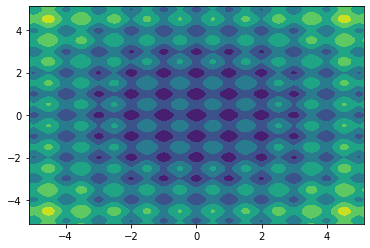

In [22]:
arrsize=500
tmp = np.linspace(-5.12, 5.12, arrsize)
X, Y = np.meshgrid(tmp, tmp)
Z = 10 * 2 + (X**2 - 10*np.cos(2*np.pi*X) + Y**2 - 10*np.cos(2*np.pi*Y))

bigX = np.stack((X, Y), axis=2).reshape(-1,2)
smolY = Z.reshape(-1,1)

bigX_norm = normalize(bigX)

plt.contourf(X, Y, Z)

Iteration 1, loss = 64.76711304
Iteration 2, loss = 50.56454989
Iteration 3, loss = 50.39166499
Iteration 4, loss = 50.24738736
Iteration 5, loss = 50.06030951
Iteration 6, loss = 49.93800136
Iteration 7, loss = 49.80676283
Iteration 8, loss = 49.74301959
Iteration 9, loss = 49.68088560
Iteration 10, loss = 49.64400346
Iteration 11, loss = 49.60273944
Iteration 12, loss = 49.55743968
Iteration 13, loss = 49.55871815
Iteration 14, loss = 49.53999684
Iteration 15, loss = 49.53008689
Iteration 16, loss = 49.50606098
Iteration 17, loss = 49.50584962
Iteration 18, loss = 49.48109404
Iteration 19, loss = 49.47870214
Iteration 20, loss = 49.46858070
Iteration 21, loss = 49.44004305
Iteration 22, loss = 49.44146574
Iteration 23, loss = 49.44663611
Iteration 24, loss = 49.41521238
Iteration 25, loss = 49.40511531
Iteration 26, loss = 49.38965131
Iteration 27, loss = 49.39175291
Iteration 28, loss = 49.36721858
Iteration 29, loss = 49.34759872
Iteration 30, loss = 49.32459473
Iteration 31, loss 

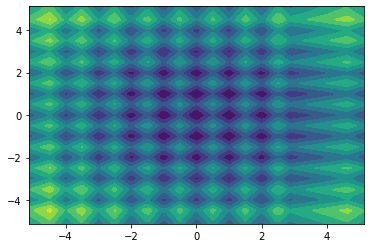

In [24]:
nn = MLPR(
    hidden_layer_sizes=(100, 3),
    solver='sgd',
    max_iter=5000,
    alpha=0,
    learning_rate='constant',
    learning_rate_init=0.0001,
    momentum = 0.9,
    nesterovs_momentum=True,
    n_iter_no_change = 10,
    random_state = 123457908,
    shuffle=True,
    verbose=True)
nn.fit(bigX, smolY.ravel())
mean = nn.predict(bigX)

plt.contourf(X, Y, mean.reshape(-1, arrsize))

In [ ]:
#    N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
#  5005   5000   5272      1     0     0   5.014D+00   1.255D+01
#   F =   12.545443458005204    

In [74]:
sampler = qmc.LatinHypercube(d=1, seed=439)
sample = sampler.random(50)
sample = qmc.scale(sample, -5.12, 5.12).ravel()

In [2]:
lhs = qmc.LatinHypercube(d=1, seed=234089567)

ntk = (
    ConstantKernel(
        constant_value=1, 
        constant_value_bounds=(1e-9, 1e5)
    ) * 
    NTK(depth=3, c=2, 
        bias=1e-1, 
        bias_bounds=(1e-9, 1e3)
    ) 
)


gp = GPR(kernel=ntk, alpha=1e-5, n_restarts_optimizer=4)

# 500 data points
for i in trange(0, 1):
    sample = lhs.random(65)
    sample = np.sort(qmc.scale(sample, -5.12, 5.12).ravel(), kind='megesort')
    sample = np.linspace(0, 5.12, 90)
    X, Y = np.meshgrid(sample, sample)
    Z = 10 * 2 + (X**2 - 10*np.cos(2*np.pi*X) + Y**2 - 10*np.cos(2*np.pi*Y))
    bigX = np.stack((X, Y), axis=2).reshape(-1,2)
    smolY = Z.reshape(-1,1)

    gp.fit(bigX, smolY)

  0%|          | 0/1 [00:00<?, ?it/s]


TypeError: wrap() got an unexpected keyword argument 'eval_gradient'

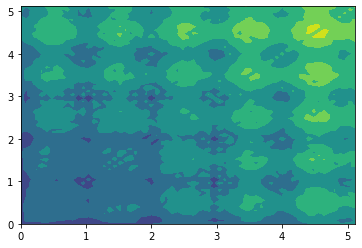

In [72]:
arrsize=90
tmp = np.linspace(0, 5.12, arrsize)
X, Y = np.meshgrid(tmp, tmp)
# Z = 10 * 2 + (X**2 - 10*np.cos(2*np.pi*X) + Y**2 - 10*np.cos(2*np.pi*Y))
bigX = np.stack((X, Y), axis=2).reshape(-1,2)

mean = gp.predict(bigX)
plt.contourf(X, Y, mean.reshape(arrsize, arrsize))

100%|██████████| 100/100 [10:29<00:00,  6.30s/it]


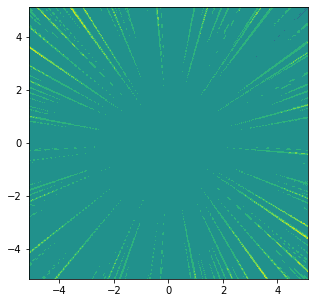

In [ ]:
arrsize=500
tmp = np.linspace(-5.12, 5.12, arrsize)
X, Y = np.meshgrid(tmp, tmp)
Z = 10 * 2 + (X**2 - 10*np.cos(2*np.pi*X) + Y**2 - 10*np.cos(2*np.pi*Y))
bigX = np.stack((X, Y), axis=2).reshape(-1,2)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

mean = np.array([]).reshape(-1,1)
for i in trange(0, 250000, 2500):
    mean = np.append(mean, gp.predict(bigX[i:i+2500]))

ax.contourf(X, Y, mean.reshape(arrsize,arrsize))

In [64]:
mean.reshape(500,500), Z

(array([[  65.22525787,  -34.18469238,  -23.70171356, ...,   85.87583351,
          105.11698341,   83.40002251],
        [ -34.18460083,   62.81028748,  -34.06532288, ...,  104.55253792,
           83.06562233,   59.54198647],
        [ -23.70172119,  -34.06541443,   63.40270233, ...,   82.7312088 ,
           59.19568825,   64.96947289],
        ...,
        [  85.87583733,  104.55255127,   82.73120689, ...,   70.88218498,
         -296.97587967, -222.04208088],
        [ 105.11703682,   83.06560135,   59.19569778, ..., -296.97583485,
           71.79166031, -298.39384842],
        [  83.40005302,   59.54198074,   64.96948051, ..., -222.0421505 ,
         -298.39386368,   71.18739891]]),
 array([[57.84942745, 56.82002988, 55.92610516, ..., 55.92610516,
         56.82002988, 57.84942745],
        [56.82002988, 55.7906323 , 54.89670759, ..., 54.89670759,
         55.7906323 , 56.82002988],
        [55.92610516, 54.89670759, 54.00278287, ..., 54.00278287,
         54.89670759, 55.926105

/home/rona1das/Tools/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


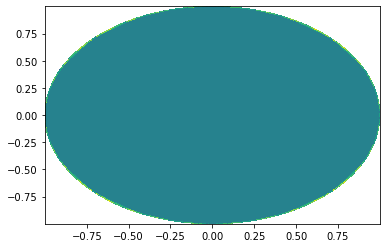

In [11]:
arrsize=50
tmp = np.linspace(-5.12, 5.12, arrsize)
X, Y = np.meshgrid(tmp, tmp)
Z = 10 * 2 + (X**2 - 10*np.cos(2*np.pi*X) + Y**2 - 10*np.cos(2*np.pi*Y))

bigX = np.stack((X, Y), axis=2).reshape(-1,2)
smolY = Z.reshape(-1,1)

ntk = (
    ConstantKernel(
        constant_value=1, 
        constant_value_bounds=(1e-9, 1e5)
    ) * 
    NTK(depth=1, c=2, 
        bias=1e-1, 
        bias_bounds=(1e-9, 1e3)
    ) 
)

bigX = normalize(bigX)

gp = GPR(kernel=ntk, n_restarts_optimizer=0)
gp.fit(bigX, smolY)
mean = gp.predict(normalize(bigX))

bigX = bigX.reshape(arrsize, arrsize, 2)
plt.contourf(bigX[:,:,0], bigX[:,:,1], mean.reshape(-1, arrsize))

array([[-0.70710678, -0.70710678],
       [-0.69735496, -0.71672593],
       [-0.68719985, -0.72646842],
       ...,
       [ 0.68719985,  0.72646842],
       [ 0.69735496,  0.71672593],
       [ 0.70710678,  0.70710678]])

/home/rona1das/Tools/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


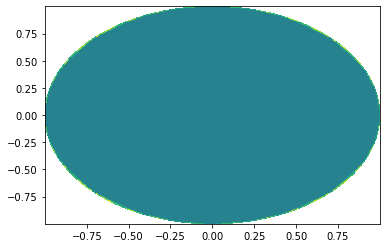

In [15]:
arrsize=50
tmp = np.linspace(-5.12, 5.12, arrsize)
X, Y = np.meshgrid(tmp, tmp)
Z = 10 * 2 + (X**2 - 10*np.cos(2*np.pi*X) + Y**2 - 10*np.cos(2*np.pi*Y))

bigX = np.stack((X, Y), axis=2).reshape(-1,2)
smolY = Z.reshape(-1,1)

lpk = (
    ConstantKernel(
        constant_value=0.05, 
        constant_value_bounds=(1e-9, 1e1) 
    ) * 
    Matern(
        nu=1/2,
        length_scale=1000,
        length_scale_bounds='fixed',#(1e-1, 1e3), 
    ) 
)

bigX = normalize(bigX)

gp = GPR(kernel=lpk, n_restarts_optimizer=9)
gp.fit(bigX, smolY)
mean = gp.predict(bigX)

bigX = bigX.reshape(arrsize, arrsize, 2)
plt.contourf(bigX[:,:,0], bigX[:,:,1], mean.reshape(-1, arrsize))



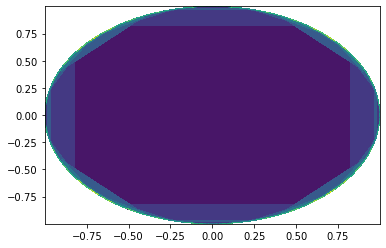

In [14]:
plt.contourf(bigX[:,:,0], bigX[:,:,1], Z)

## Noiseless

### $\mathbb{R}^d$

In [14]:
ntk = (
    ConstantKernel(
        constant_value=1, 
        constant_value_bounds=(1e-9, 1e5)
    ) * 
    NTK(depth=1, c=2, 
        bias=1e-1, 
        bias_bounds=(1e-9, 1e3)
    ) 
)

lpk = (
    ConstantKernel(
        constant_value=0.05, 
        constant_value_bounds=(1e-9, 1e1) 
    ) * 
    Matern(
        nu=1/2,
        length_scale=1000,
        length_scale_bounds='fixed',#(1e-1, 1e3), 
    ) 
)

gp_ntk = GPR(kernel=ntk, alpha=1e-9, n_restarts_optimizer=9)
gp_ntk.fit(X_train, y_train)
print('NTK     : ', gp_ntk.kernel_)
mean_ntk = gp_ntk.predict(X)
_ = plot(X, mean_ntk.ravel(), 'kernel', 'NTK')

gp_lpk = GPR(kernel=lpk, alpha=1e-9, n_restarts_optimizer=9)
gp_lpk.fit(X_train, y_train)
print('Laplace : ', gp_lpk.kernel_)
mean_lpk = gp_lpk.predict(X)
_ = plot(X, mean_lpk.ravel(), 'kernel', 'PLK')

ValueError: Found array with dim 3. Estimator expected <= 2.

In [15]:
mean_ntk.shape

(200, 200)

### $\mathbb{S}^{d-1}$

NTK     :  108**2 * NTK(depth=1, c=2.000, bias=0.134)
Laplace :  3.16**2 * Matern(length_scale=1e+03, nu=0.5)


/home/rona1das/Tools/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


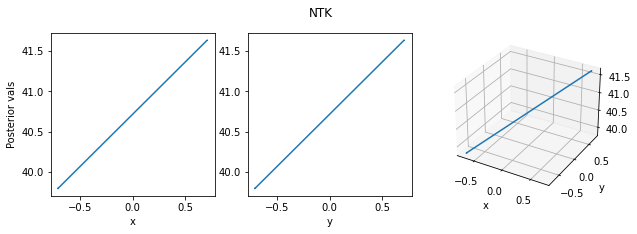

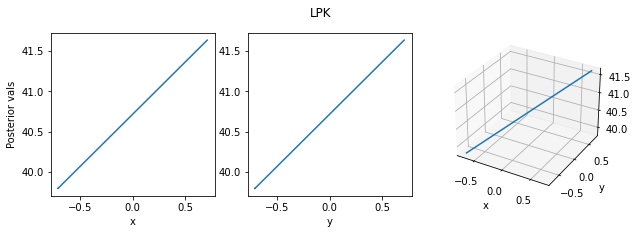

In [37]:
gp_ntk = GPR(kernel=ntk, alpha=1e-5, n_restarts_optimizer=9)
gp_ntk.fit(X_train_norm, y_train_norm)
print('NTK     : ', gp_ntk.kernel_)
mean_ntk = gp_ntk.predict(X_norm)
_=plot(X_norm, mean_ntk.ravel(), 'kernel', title='NTK')

gp_lpk = GPR(kernel=lpk, alpha=1e-5, n_restarts_optimizer=9)
gp_lpk.fit(X_train_norm, y_train_norm)
print('Laplace : ', gp_lpk.kernel_)
mean_lpk = gp_lpk.predict(X_norm)
_=plot(X_norm, mean_lpk.ravel(), 'kernel', title='LPK')

## Noisy

### $\mathbb{R}^d$

/home/rona1das/Tools/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__bias is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


NTK     :  18.3**2 * NTK(depth=2, c=2.000, bias=100.000) + WhiteKernel(noise_level=0.15)


/home/rona1das/Tools/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Laplace :  31.6**2 * Matern(length_scale=3.81, nu=0.5) + WhiteKernel(noise_level=0.15)


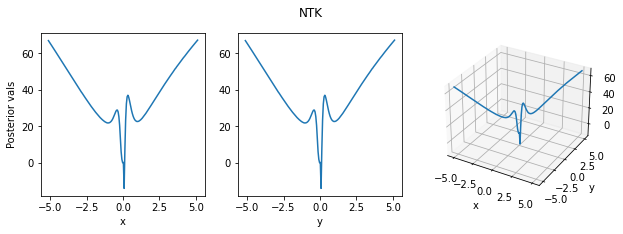

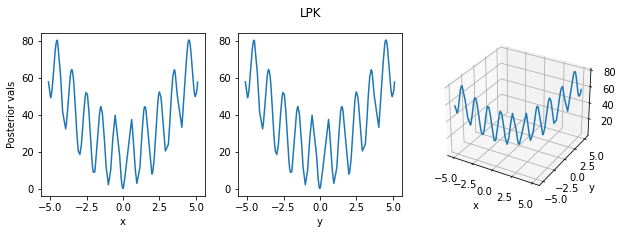

In [38]:
ntk = (
    ConstantKernel(
        constant_value=1.0, 
        constant_value_bounds=(1e-9, 1e5)
    ) * 
    NTK(depth=2, c=2, 
        bias=1e-9, 
        bias_bounds=(1e-9, 1e2)
    ) 
    + WhiteKernel(
        noise_level=0.15, 
        noise_level_bounds='fixed'#(1e-9, 1e5)
    )
)

lpk = (
    ConstantKernel(
        constant_value=1.0, 
        constant_value_bounds=(1e-3, 1e3)
    ) * Matern(
        nu=1/2,
        length_scale=10,
        length_scale_bounds=(1e-1, 1e3), 
    ) 
    + WhiteKernel(
        noise_level=0.15, 
        noise_level_bounds='fixed'#(1e-9, 1e5)
    )
)
# alpha deals with std 
gp_ntk = GPR(kernel=ntk, alpha=1e-9, n_restarts_optimizer=9)
gp_ntk.fit(X_train, y_train_noisy)
print('NTK     : ', gp_ntk.kernel_)
mean_ntk = gp_ntk.predict(X)
_=plot(X, mean_ntk.ravel(), 'kernel', title='NTK')

gp_lpk = GPR(kernel=lpk, alpha=1e-9, n_restarts_optimizer=9)
gp_lpk.fit(X_train, y_train_noisy)
print('Laplace : ', gp_lpk.kernel_)
mean_lpk = gp_lpk.predict(X)
_=plot(X, mean_lpk.ravel(), 'kernel', title='LPK')

### $\mathbb{S}^{d-1}$

NTK     :  151**2 * NTK(depth=2, c=2.000, bias=0.000) + WhiteKernel(noise_level=0.15)


/home/rona1das/Tools/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Laplace :  31.6**2 * Matern(length_scale=3.82, nu=0.5) + WhiteKernel(noise_level=0.15)


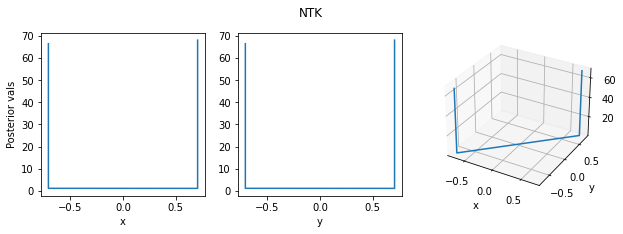

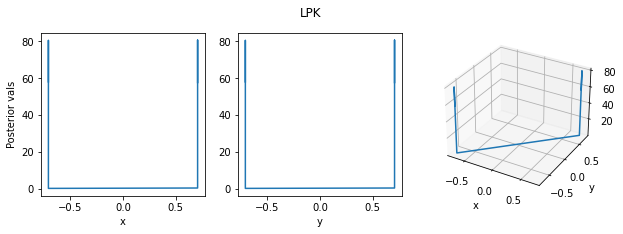

In [39]:
gp_ntk = GPR(kernel=ntk, alpha=0, n_restarts_optimizer=9)
gp_ntk.fit(X_train, y_train_norm_noisy)
print('NTK     : ', gp_ntk.kernel_)
mean_ntk = gp_ntk.predict(X)
_=plot(X_norm, mean_ntk.ravel(), 'kernel', title='NTK')

gp_lpk = GPR(kernel=lpk, alpha=0, n_restarts_optimizer=9)
gp_lpk.fit(X_train, y_train_norm_noisy)
print('Laplace : ', gp_lpk.kernel_)
mean_lpk = gp_lpk.predict(X)
_=plot(X_norm, mean_lpk.ravel(), 'kernel', title='LPK')

# $f(x,y) = -\cos(x)\cos(y)\exp\left(-\left((x-\pi)^2 + (y-\pi)^2\right)\right)$ (Easom function)

## Dataset

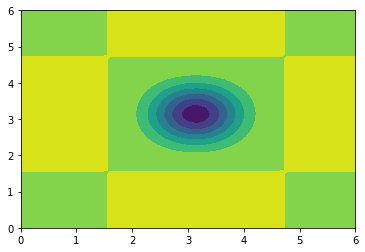

In [19]:
arrsize=50
tmp = np.linspace(0, 6, arrsize)
X, Y = np.meshgrid(tmp, tmp)
Z = -np.cos(X)*np.cos(Y)*np.exp(-((X-np.pi)**2 + (Y-np.pi)**2))

bigX = np.stack((X, Y), axis=2).reshape(-1,2)
smolY = Z.reshape(-1,1)

bigX_norm = normalize(bigX)

plt.contourf(X, Y, Z)

Iteration 1, loss = 0.06776528
Iteration 2, loss = 0.06186337
Iteration 3, loss = 0.05506649
Iteration 4, loss = 0.04882017
Iteration 5, loss = 0.04335270
Iteration 6, loss = 0.03872075
Iteration 7, loss = 0.03470645
Iteration 8, loss = 0.03130855
Iteration 9, loss = 0.02838893
Iteration 10, loss = 0.02590233
Iteration 11, loss = 0.02377817
Iteration 12, loss = 0.02197130
Iteration 13, loss = 0.02043757
Iteration 14, loss = 0.01911640
Iteration 15, loss = 0.01798908
Iteration 16, loss = 0.01703209
Iteration 17, loss = 0.01622609
Iteration 18, loss = 0.01553516
Iteration 19, loss = 0.01495294
Iteration 20, loss = 0.01445332
Iteration 21, loss = 0.01402837
Iteration 22, loss = 0.01366535
Iteration 23, loss = 0.01335758
Iteration 24, loss = 0.01310188
Iteration 25, loss = 0.01287686
Iteration 26, loss = 0.01268555
Iteration 27, loss = 0.01252350
Iteration 28, loss = 0.01238664
Iteration 29, loss = 0.01226975
Iteration 30, loss = 0.01217005
Iteration 31, loss = 0.01208722
Iteration 32, los

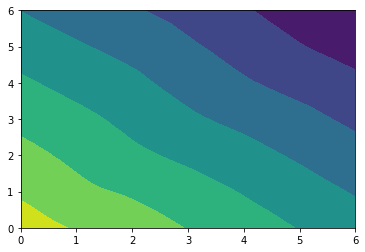

In [20]:
nn = MLPR(
    hidden_layer_sizes=(10000, 3),
    solver='sgd',
    max_iter=5000,
    alpha=0,
    learning_rate='adaptive',
    learning_rate_init=0.0001,
    momentum = 0.9,
    nesterovs_momentum=True,
    n_iter_no_change = 20,
    random_state = 123457908,
    shuffle=True,
    verbose=True)
nn.fit(bigX_norm, smolY.ravel())
mean = nn.predict(bigX)

plt.contourf(X, Y, mean.reshape(-1, arrsize))

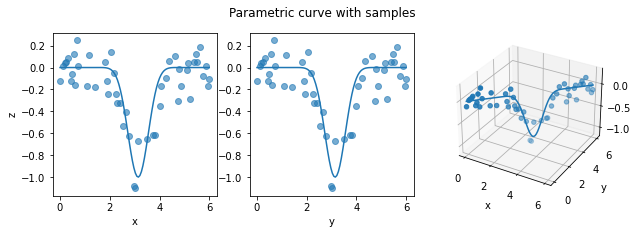

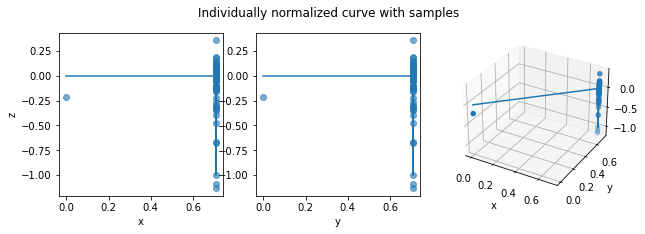

In [40]:
x = np.linspace(0, 6, 100)
y = x
z = -np.cos(x)*np.cos(y)*np.exp(-((x-np.pi)**2 + (y-np.pi)**2))
datasets = processing(x,y,z)
X, y = datasets['orig']
X_norm, y_norm = datasets['norm']
X_train, y_train, y_train_noisy = datasets['orig train']
X_train_norm, y_train_norm, y_train_norm_noisy = datasets['norm train']

_ = plot(
    (X, X_train), 
    (z.ravel(), y_train_noisy), 
    typ='data', 
    title="Parametric curve with samples"
)
_ = plot(
    (X_norm, X_train_norm), 
    (y_norm.ravel(), y_train_norm_noisy), 
    typ='data', 
    title="Individually normalized curve with samples"
)

## Noiseless

### $\mathbb{R}^d$

NTK     :  0.309**2 * NTK(depth=2, c=2.000, bias=249.216)
Laplace :  0.273**2 * Matern(length_scale=4.76, nu=0.5)


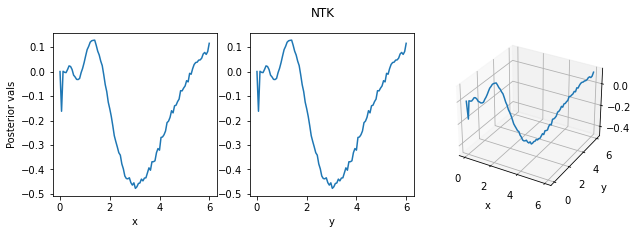

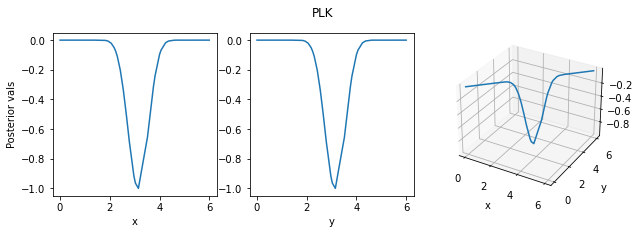

In [41]:
ntk = (
    ConstantKernel(
        constant_value=1, 
        constant_value_bounds=(1e-9, 1e5)
    ) * 
    NTK(depth=2, c=2, 
        bias=1e-1, 
        bias_bounds=(1e-9, 1e3)
    ) 
)

lpk = (
    ConstantKernel(
        constant_value=0.05, 
        constant_value_bounds=(1e-9, 1e5) 
    ) * 
    Matern(
        nu=1/2,
        length_scale=10,
        length_scale_bounds=(1e-1, 1e3), 
    ) 
)

gp_ntk = GPR(kernel=ntk, alpha=1e-5, n_restarts_optimizer=9)
gp_ntk.fit(X_train, y_train)
print('NTK     : ', gp_ntk.kernel_)
mean_ntk = gp_ntk.predict(X)
_ = plot(X, mean_ntk.ravel(), 'kernel', 'NTK')

gp_lpk = GPR(kernel=lpk, alpha=1e-5, n_restarts_optimizer=9)
gp_lpk.fit(X_train, y_train)
print('Laplace : ', gp_lpk.kernel_)
mean_lpk = gp_lpk.predict(X)
_ = plot(X, mean_lpk.ravel(), 'kernel', 'PLK')

### $\mathbb{S}^{d-1}$

NTK     :  0.074**2 * NTK(depth=2, c=2.000, bias=0.000)
Laplace :  0.0907**2 * Matern(length_scale=0.243, nu=0.5)


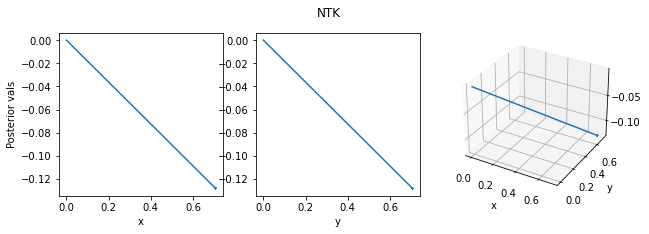

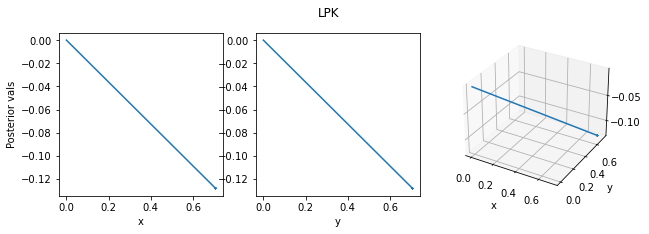

In [42]:
gp_ntk = GPR(kernel=ntk, alpha=1e-5, n_restarts_optimizer=9)
gp_ntk.fit(X_train_norm, y_train_norm)
print('NTK     : ', gp_ntk.kernel_)
mean_ntk = gp_ntk.predict(X_norm)
_=plot(X_norm, mean_ntk.ravel(), 'kernel', title='NTK')

gp_lpk = GPR(kernel=lpk, alpha=1e-5, n_restarts_optimizer=9)
gp_lpk.fit(X_train_norm, y_train_norm)
print('Laplace : ', gp_lpk.kernel_)
mean_lpk = gp_lpk.predict(X_norm)
_=plot(X_norm, mean_lpk.ravel(), 'kernel', title='LPK')

## Noisy

### $\mathbb{R}^d$

/home/rona1das/Tools/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/rona1das/Tools/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__bias is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


NTK     :  0.000927**2 * NTK(depth=2, c=2.000, bias=100.000) + WhiteKernel(noise_level=0.15)
Laplace :  0.26**2 * Matern(length_scale=2.84, nu=0.5) + WhiteKernel(noise_level=0.15)


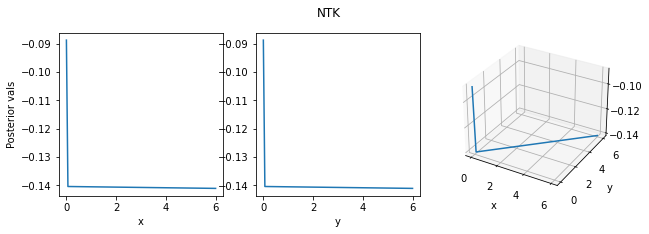

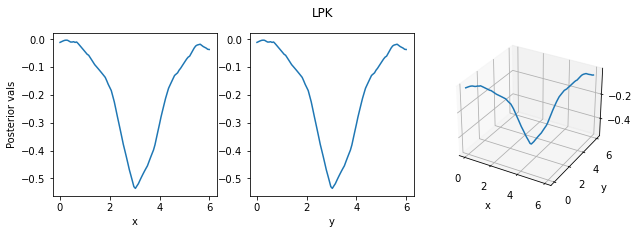

In [43]:
ntk = (
    ConstantKernel(
        constant_value=1.0, 
        constant_value_bounds=(1e-9, 1e5)
    ) * 
    NTK(depth=2, c=2, 
        bias=1e-9, 
        bias_bounds=(1e-9, 1e2)
    ) 
    + WhiteKernel(
        noise_level=0.15, 
        noise_level_bounds='fixed'#(1e-9, 1e5)
    )
)

lpk = (
    ConstantKernel(
        constant_value=1.0, 
        constant_value_bounds=(1e-3, 1e3)
    ) * Matern(
        nu=1/2,
        length_scale=10,
        length_scale_bounds=(1e-1, 1e3), 
    ) 
    + WhiteKernel(
        noise_level=0.15, 
        noise_level_bounds='fixed'#(1e-9, 1e5)
    )
)
# alpha deals with std 
gp_ntk = GPR(kernel=ntk, alpha=0, n_restarts_optimizer=9)
gp_ntk.fit(X_train, y_train_noisy)
print('NTK     : ', gp_ntk.kernel_)
mean_ntk = gp_ntk.predict(X)
_=plot(X, mean_ntk.ravel(), 'kernel', title='NTK')

gp_lpk = GPR(kernel=lpk, alpha=0, n_restarts_optimizer=9)
gp_lpk.fit(X_train, y_train_noisy)
print('Laplace : ', gp_lpk.kernel_)
mean_lpk = gp_lpk.predict(X)
_=plot(X, mean_lpk.ravel(), 'kernel', title='LPK')

### $\mathbb{S}^{d-1}$

/home/rona1das/Tools/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__bias is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


NTK     :  0.000794**2 * NTK(depth=2, c=2.000, bias=100.000) + WhiteKernel(noise_level=0.15)
Laplace :  0.262**2 * Matern(length_scale=2.16, nu=0.5) + WhiteKernel(noise_level=0.15)


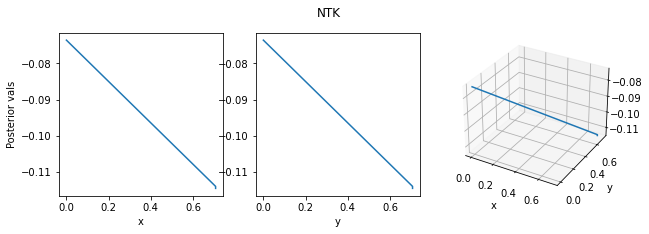

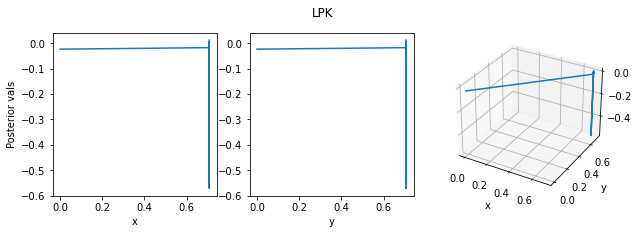

In [44]:
gp_ntk = GPR(kernel=ntk, alpha=0, n_restarts_optimizer=9)
gp_ntk.fit(X_train, y_train_norm_noisy)
print('NTK     : ', gp_ntk.kernel_)
mean_ntk = gp_ntk.predict(X)
_=plot(X_norm, mean_ntk.ravel(), 'kernel', title='NTK')

gp_lpk = GPR(kernel=lpk, alpha=0, n_restarts_optimizer=9)
gp_lpk.fit(X_train, y_train_norm_noisy)
print('Laplace : ', gp_lpk.kernel_)
mean_lpk = gp_lpk.predict(X)
_=plot(X_norm, mean_lpk.ravel(), 'kernel', title='LPK')